<a href="https://colab.research.google.com/github/Resh-Eli/BasicANN-price-classification/blob/master/MobilePrice_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mobile Price Classification


This code works on a dataset of mobile phones where the different features are stated in columns. 
The objective of this project is to predict the mobile price range that a mobile phone with a set of features will fall in and hence study the impact of different features in predicting mobile price ranges. 
The dataset consists of 20 features and the price ranges are divided into 4 classes: 0 ,1 ,2 and 3.

We have used a Artificial Neural network (ANN) to create the prediction model. 
The following machine learning steps are followed in the code:
Preparation and load data-  data is the key for the working of neural network and we need to process it before feeding to the neural network. In this step, we will also visualize data which will help us to gain insight into the data.

Model definition- Now we need a neural network model. This means we need to specify the number of hidden layers in the neural network and their size, the input and output size.

Loss and optimizer- Now we define the loss function according to our task. We also need to specify the optimizer to use with learning rate and other hyperparameters of the optimizer.

Fitting the  model- This is the training step of the neural network. Here we need to define the number of epochs for which we need to train the neural network.

After fitting model, we can test it on test data to check whether the case of overfitting. We can save the weights of the model and use it later whenever required.


**Importing the necessary packages and reading in the mobile dataset.**

*   List item
*   List item



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#dataset import
dataset = pd.read_csv('train.csv')
dataset.head(11)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


**Explore the data with the following commands:**
 
 print and calculate the following summary statistics: min, max, mean, standard deviation, frequency and count of the data in dataset data.
 



**Displaying the mobile phone features**

In [0]:
dataset = pd.read_csv('train.csv')

#Statistics of the dataset
print("Statistical description of the dataset")
dataset.describe()

Statistical description of the dataset


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [0]:
#name of columns
dataset.columns

#Data Types of the different columns or features
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


Distribution of mobile phones in the dataset between different price ranges 

AxesSubplot(0.125,0.125;0.775x0.755)


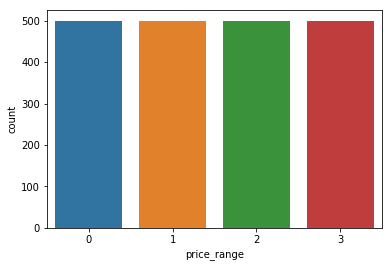

In [0]:
#Exploring the number of mobile phones in each price range
print("Uniform Distribution of number of mobile phones in the dataset between different price ranges", '\n')
print(sns.countplot(dataset['price_range'],label="Count")

Text(0.5, 0.98, 'Feature Correlation Matrix')

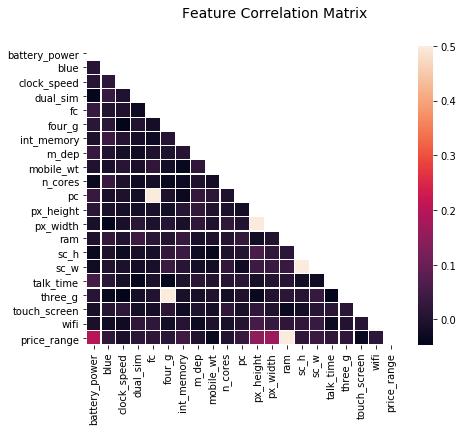

In [0]:
#Correlation matrix of the different features of mobile phones
corr= dataset.corr()
fig = plt.figure(figsize=(7, 5.5))
mask = np.zeros_like(corr, dtype=np.bool) # create mask to cover the upper triangle
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=False, mask=mask, vmax=0.5, linewidths=0.2)
fig.suptitle('Feature Correlation Matrix', fontsize=14)

The correlation matrix shows that the RAM capacity of a phone has a high correlation with the price range its cost falls in. 
Pixel sizes have higher correlation with price ranges than the other features 

##Preprocessing & Feature engineering 

All the features are split between dependant and independant variables. X will contain all the features from columns 0 to 19 and Y will contain the target or class "price range" which is in column 20.


In [0]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

###Normalization of dataset

The next step is used to normalize the data. Normalization is a technique used to change the values of an array to a common scale, without distorting differences in the ranges of values. 
As displayed, the dataset features vary a lot. For instance, the value of battery power (column 0) is in the 1000's and clock speed (column 2) is less than 3.
Hence normalization is required prior to passing the data to neural network so that gradient descents can converge more quickly. 
If we feed unnormalized data to the neural network, the gradients will change differently for every column and thus the learning will oscillate and this would affect the model learning.

In [0]:
#Displaying the un-normalized data
print('Un-normalized data:')
print(X[0])
print('\n')

#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print('Normalized data:')
print(X[0])

Un-normalized data:
[8.420e+02 0.000e+00 2.200e+00 0.000e+00 1.000e+00 0.000e+00 7.000e+00
 6.000e-01 1.880e+02 2.000e+00 2.000e+00 2.000e+01 7.560e+02 2.549e+03
 9.000e+00 7.000e+00 1.900e+01 0.000e+00 0.000e+00 1.000e+00]


Normalized data:
[-0.90259726 -0.9900495   0.83077942 -1.01918398 -0.76249466 -1.04396559
 -1.38064353  0.34073951  1.34924881 -1.10197128 -1.3057501  -1.40894856
 -1.14678403  0.39170341 -0.78498329  0.2831028   1.46249332 -1.78686097
 -1.00601811  0.98609664]


###One hot encoding of the Mobile price range feature

Next step is to one hot encode the classes. One hot encoding is a process to convert integer classes into binary values. Binarization of the class feature makes prediction better. 
This dataset has 4 classes or 4 price ranges labelled as 0, 1, 2 and 3. With oneHotEncoder function, these get binarized as displayed below.

In [0]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
print('One hot encoded array:')
print(y[0:5])

One hot encoded array:
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


### Splitting data into Train & Test

Now the data is split into training and testing data. Training data is the data on which we will train our neural network. Test data is used to check our trained neural network. 
This data is totally new for our neural network and if the neural network performs well on this dataset, it shows that there is no overfitting.

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)


This will split our dataset into training and testing. Training data (X_train,y_train) will have 90% samples and test data (X_test, y_test) will have 10% samples. This is specified by the test_size argument.
Now our dataset is processed and ready to feed in the neural network.

# ##Machine Learning Model 

### Building an ANN 
Aritificial Neural Network will be used to build the model.

Keras is a simple tool for constructing a neural network. It is a high-level framework based on tensorflow, theano or cntk backends.
In the mobile dataset, the input is of 20 values and output is of 4 values. 
So the input and output layer is of 20 and 4 dimensions respectively.

In [0]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense

# Neural network
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

We have defined the neural network with two hidden layers of 16 and 12 dimensions.
The model created is sequential and fully connected. Hence the output of each layer is input to the next layer.
The activation function used for the hidden layers is relu (Rectified Linear Unit Activation Function). 
Softmax is used as the activation function in the output layer as the model requires multiclass classification i.e, 4 classes of price_ranges that the prediction can fall in.


###Loss & Optimizer

The loss function and the optimizer will be defined using compile function in keras.

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Here loss is cross entropy loss . Categorical_crossentropy specifies that we have multiple classes. 
The optimization algorithm used is Adam. 
Metrics is used to specify the way we want to judge the performance of our neural network. Here we have specified it to accuracy.

Now we are done with building a neural network and we will train it.

*[italicized text](https://)*###Fitting the model



In [0]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)


W0703 18:51:42.805076 140516684703616 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
1800/1800 [==============================] - 1s 296us/step - loss: 1.5955 - acc: 0.1978
Epoch 2/100
1800/1800 [==============================] - 0s 23us/step - loss: 1.4822 - acc: 0.2233
Epoch 3/100
1800/1800 [==============================] - 0s 22us/step - loss: 1.4258 - acc: 0.2494
Epoch 4/100
1800/1800 [==============================] - 0s 22us/step - loss: 1.3897 - acc: 0.2728
Epoch 5/100
1800/1800 [==============================] - 0s 22us/step - loss: 1.3599 - acc: 0.3144
Epoch 6/100
1800/1800 [==============================] - 0s 24us/step - loss: 1.3284 - acc: 0.3589
Epoch 7/100
1800/1800 [==============================] - 0s 24us/step - loss: 1.2911 - acc: 0.4039
Epoch 8/100
1800/1800 [==============================] - 0s 26us/step - loss: 1.2425 - acc: 0.4494
Epoch 9/100
1800/1800 [==============================] - 0s 23us/step - loss: 1.1839 - acc: 0.4928
Epoch 10/100
1800/1800 [==============================] - 0s 23us/step - loss: 1.1137 - acc: 0.5311
Epoch 11

Here we need to specify the input data-> X_train, labels-> y_train, number of epochs(iterations), and batch size. It returns the history of model training. History consists of model accuracy and losses after each epoch. We will visualize it later.

Usually, the dataset is very big and we cannot fit complete data at once so we use batch size. This divides our data into batches each of size equal to batch_size. Now only this number of samples will be loaded into memory and processed. Once we are done with one batch it is flushed from memory and the next batch will be processed.

##Test model

Now we can check the model's performance on test data:

In [0]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

This step is inverse one hot encoding process. We will get integer labels using this step. We can predict on test data using a simple method of keras, model.predict(). 
It will take the test data as input and will return the prediction outputs as softmax.

In [0]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 96.0


###Validation data

We can use test data as validation data and can check the accuracies after every epoch. This will give us an insight into overfitting at the time of training only and we can take steps before the completion of all epochs. We can do this by changing fit function as:

In [0]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
#Re initialized to delete trained weights
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Train on 1800 samples, validate on 200 samples
Epoch 1/100
1800/1800 [==============================] - 0s 220us/step - loss: 1.7141 - acc: 0.2200 - val_loss: 1.5306 - val_acc: 0.2650
Epoch 2/100
1800/1800 [==============================] - 0s 24us/step - loss: 1.5199 - acc: 0.2256 - val_loss: 1.4206 - val_acc: 0.2900
Epoch 3/100
1800/1800 [==============================] - 0s 25us/step - loss: 1.4292 - acc: 0.2517 - val_loss: 1.3598 - val_acc: 0.3350
Epoch 4/100
1800/1800 [==============================] - 0s 24us/step - loss: 1.3667 - acc: 0.2956 - val_loss: 1.3051 - val_acc: 0.4200
Epoch 5/100
1800/1800 [==============================] - 0s 25us/step - loss: 1.3022 - acc: 0.3617 - val_loss: 1.2339 - val_acc: 0.4850
Epoch 6/100
1800/1800 [==============================] - 0s 24us/step - loss: 1.2201 - acc: 0.4356 - val_loss: 1.1516 - val_acc: 0.5200
Epoch 7/100
1800/1800 [==============================] - 0s 27us/step - loss: 1.1238 - acc: 0.5044 - val_loss: 1.0576 - val_acc: 0.5750


##Visualizations

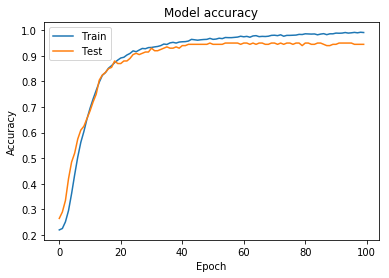

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

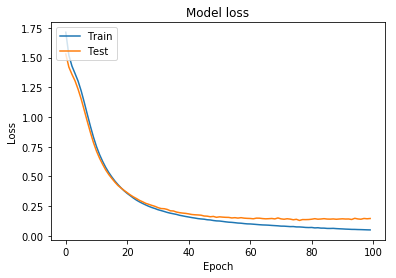

In [0]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()